In [ ]:
""" Utils """
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm
from scipy.integrate import odeint
from itertools import chain

In [ ]:
x1=pd.read_csv("/content/x1.csv")
t1=x1.values.tolist()
x1_r=list(chain(*t1))
y1=pd.read_csv("/content/y1.csv")
t2=y1.values.tolist()
y1_l=list(chain(*t2))

In [ ]:
#Here x is master system, y is slave syste and z is auxillary sytem(copy of master)
def auxillary(z1,z2,z3,k):
  z1_dot=sigma*(z2-z1)+alp*(x1_r[k]-z1)
  z2_dot=z1*(rho-z3)-z2
  z3_dot=-1*beta*z3+z1*z2
  return (z1_dot,z2_dot,z3_dot)

In [ ]:
def RungeKutta4(fun,a1,b1,c1,n,dt):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    t[0] = 0

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):
        t[k+1] = t[k] + dt
        k1,l1,m1 = fun(x1[k], y1[k], z1[k],k)
        k2,l2,m2 = fun((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),k)
        k3,l3,m3 = fun((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),k)
        k4,l4,m4 = fun((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),k)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)
    return x1,y1,z1,t

In [ ]:
""" Initial values unchanged """
sigma = 10
beta = 8/3
rho = 28
alp=0.2
N=10000
dt=0.01
z_1, z_2, z_3,t =RungeKutta4(auxillary,1,0,0,N,dt)

In [ ]:
E=[np.sqrt(pow((a - b),2)) for a, b in zip(z_1, y1_l)]

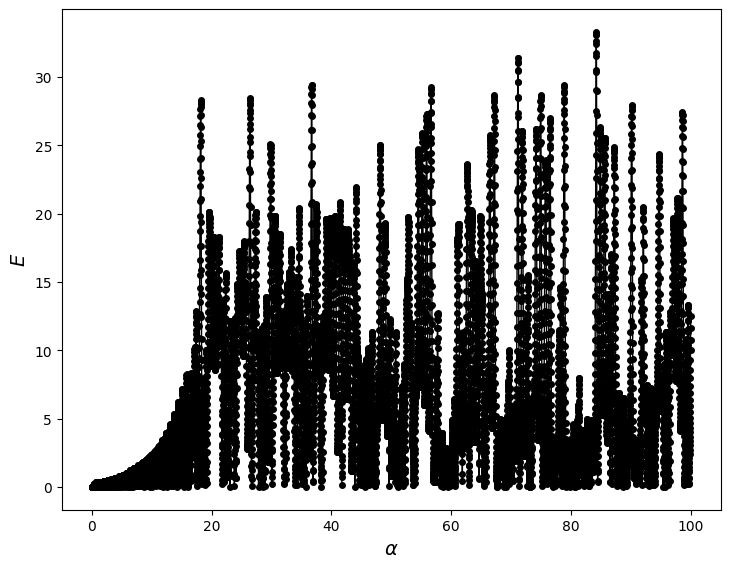

In [ ]:
plt.figure (figsize = (8.5,6.5))
plt.plot(t,E, linewidth = 1, color = 'black',marker='o', markersize=4)
plt.xlabel(r"$\alpha$",fontsize=14)
plt.ylabel(r"$E$",fontsize=14)
plt.savefig('CS-Img1.pdf', format='pdf')
plt.show()

In [ ]:
def para_estimation():
  E=[abs(a - b) for a, b in zip(z_1, y1_l)]

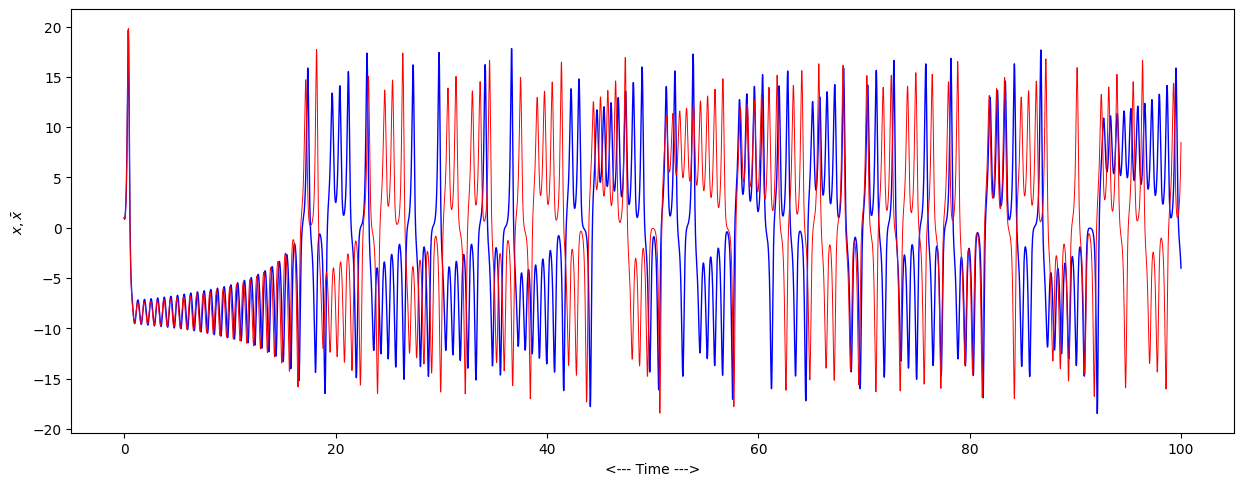

In [ ]:
plt.figure (figsize = (15,5.5))
plt.plot ( t, z_1, linewidth = 1, color = 'b' )
plt.plot ( t, y1_l, linewidth = 0.7, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$x,\bar{x}$')
#plt.ylim(0, 45)
plt.show ( )